In [1]:
import numpy as np
from scipy import sparse

import sys
sys.path.append("..")
import utils

/Users/lmar3213/miniconda3/envs/lew_conda/lib/python3.7/site-packages/lightfm/_lightfm_fast.py:9: UserWarning: LightFM was compiled without OpenMP support. Only a single thread will be used.
  warnings.warn('LightFM was compiled without OpenMP support. '


In [223]:
##The following is to calculate AVE bias:
def fast_jaccard(X, Y=None):
    """credit: https://stackoverflow.com/questions/32805916/compute-jaccard-distances-on-sparse-matrix"""
    if isinstance(X, np.ndarray):
        X = sparse.csr_matrix(X)
    if Y is None:
        Y = X
    else:
        if isinstance(Y, np.ndarray):
            Y = sparse.csr_matrix(Y)
    assert X.shape[1] == Y.shape[1]

    X = X.astype(bool).astype(int)
    Y = Y.astype(bool).astype(int)
    intersect = X.dot(Y.T)
    x_sum = X.sum(axis=1).A1
    y_sum = Y.sum(axis=1).A1
    xx, yy = np.meshgrid(x_sum, y_sum)
    union = ((xx + yy).T - intersect)
    return (1 - intersect / union).A

def get_nnrank_of_target(ligand_idx, target_idx, train_matrix):
        
    positives = train_matrix[ligand_idx].nonzero()[1]
    all_distances = fast_jaccard(fps[ligand_idx], fps)[0]
    s = np.argsort(all_distances)
    
    pred = target_idx
    curr_rank = 0
    count=1
    preds = []
    seen = []

    while pred not in seen:
    #for _ in range(100):
        predictions = train_matrix[s[count]].nonzero()[1]
    
        preds = np.setdiff1d(predictions,positives)
        preds = np.setdiff1d(preds, seen)
        
        curr_rank = len(seen)
        
        seen += list(preds)
        if len(preds)>0:
             curr_rank+= np.mean(np.arange(len(preds))+1)
        count+=1

    return curr_rank

In [224]:
train, test, fps = utils.load_time_split(year=2015, return_fingerprints=True)
#all labels:
interaction_matrix = sparse.load_npz('../0_data/interaction_matrix_pchembl.npz')

In [221]:
import tqdm 
row_idx, col_idx = test.nonzero()
nnranks = list()

for lig_idx, targ_idx in tqdm.tqdm_notebook(zip(row_idx, col_idx), total=len(row_idx)):
    nnrank = get_nnrank_of_target(lig_idx, targ_idx, train)
    print(nnrank)
    nnranks.append(nnrank)

/Users/lmar3213/miniconda3/envs/lew_conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


8.0
1.5
64.0
109.5
76.0
2.0
158.0
20.5
12.0
2.5
2.5
4.5
4.5
3.0
2.0
14.0
14.0
14.0
14.0
14.0
2.0
2.0
1.5
1.5
6.0
30.0
83.0
7.0



KeyboardInterrupt: 

In [222]:
two

array([  8. ,   2.5,  64. , 109.5,  76. ,   1.5, 158. ,  20. ,  12. ,
         2.5,   2.5,   4.5,   4.5,   3. ,   2. ,  14. ,  14. ,  14. ,
        14. ,  14. ,   2. ,   2. ,   1.5,   1.5,   6. ,  30. ,  82.5,
         7. ,  57. , 118. , 108. ,   1.5,   5. ,   1. ,   3.5,   3.5,
         2. ,  61. , 238. ,  21. ,   1. ,   2. ,  12. ,   1. ,  16. ,
        19. ,  39. ,   4.5,   8. ,   4. ,   1.5, 130. ,  81.5,   1. ,
         1. ,  11. ,  21.5,   2. ,   4. ,  17. ,  17. ,  17. ,   7. ,
        51.5,  10.5,   5.5,   5.5,   5.5,   4. ,  67. ,  13. ,  10.5,
        10.5,   4.5,   6.5,   2. ,   1. ,   5.5,   2. ,  10. ,   5.5,
         2. , 143.5, 166. ,   2. , 173. ,   1. , 169. ,  45. ,   1. ,
         3. , 142. ,  18. ,  14. ,  92. ,   9.5,   1.5,   3. ,   2. ,
        92. ,  16.5,  15.5,  52. ,  67. ,   6. ,  25. ,   4. ,  16. ,
         2. ,   2. ,  35. ,  13. ,   5. ,   1. ,   1.5,   1.5, 165. ,
        24. ,  24. ,   6. ,  30. ,  30. ,  30. ,  12. ,   6. ,   6. ,
         6. ,  30. ,

In [ ]:
np.save('nnranks.npy', nnranks)

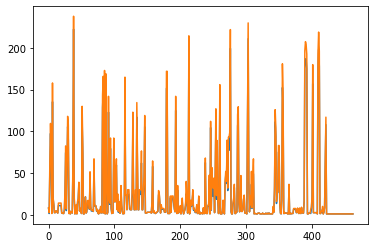

In [139]:
plt.plot(nnranks)
plt.plot(np.load('../3_time_split/processed_data/2015_nearest_neighbor.npy')[:len(nnranks)])

In [140]:
one = np.array(nnranks)
two = np.load('../3_time_split/processed_data/2015_nearest_neighbor.npy')[:len(nnranks)]

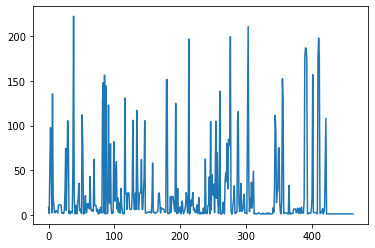

In [141]:
plt.plot(one)

In [142]:
one


array([  8. ,   1.5,  54. ,  97.5,  56.5,   2. , 135.5,  19. ,  11.5,
         2.5,   2.5,   4.5,   4.5,   3. ,   2. ,  11. ,  11. ,  11. ,
        11. ,  11. ,   2. ,   2. ,   1.5,   1.5,   5. ,  26. ,  74.5,
         5. ,  51. , 105.5,  89.5,   1.5,   4.5,   1. ,   3.5,   3.5,
         2. ,  54. , 222.5,  19. ,   1. ,   2. ,  10.5,   1. ,  13.5,
        18. ,  35.5,   4.5,   7. ,   4. ,   1.5, 112. ,  73.5,   1. ,
         1. ,  10. ,  21.5,   2. ,   3. ,  12.5,   9. ,  12.5,   6.5,
        43. ,   9.5,   4.5,   4.5,   5.5,   4. ,  62. ,  10.5,  10.5,
        10.5,   4. ,   6.5,   2. ,   1. ,   5.5,   2. ,   8.5,   3. ,
         2. , 128.5, 148. ,   2. , 156.5,   1. , 144.5,  35.5,   1. ,
         3. , 123. ,  15.5,  12.5,  79.5,   7.5,   1.5,   3. ,   2. ,
        82. ,  15.5,  15.5,  46. ,  59.5,   6.5,  19. ,   3. ,  13.5,
         2. ,   2. ,  29.5,  10.5,   4. ,   1. ,   1.5,   1.5, 131. ,
        24. ,  24. ,   6. ,  24.5,  24.5,  24.5,   7. ,   6. ,   6. ,
         6. ,  24.5,

In [143]:
two

array([  8. ,   2.5,  64. , 109.5,  76. ,   1.5, 158. ,  20. ,  12. ,
         2.5,   2.5,   4.5,   4.5,   3. ,   2. ,  14. ,  14. ,  14. ,
        14. ,  14. ,   2. ,   2. ,   1.5,   1.5,   6. ,  30. ,  82.5,
         7. ,  57. , 118. , 108. ,   1.5,   5. ,   1. ,   3.5,   3.5,
         2. ,  61. , 238. ,  21. ,   1. ,   2. ,  12. ,   1. ,  16. ,
        19. ,  39. ,   4.5,   8. ,   4. ,   1.5, 130. ,  81.5,   1. ,
         1. ,  11. ,  21.5,   2. ,   4. ,  17. ,  17. ,  17. ,   7. ,
        51.5,  10.5,   5.5,   5.5,   5.5,   4. ,  67. ,  13. ,  10.5,
        10.5,   4.5,   6.5,   2. ,   1. ,   5.5,   2. ,  10. ,   5.5,
         2. , 143.5, 166. ,   2. , 173. ,   1. , 169. ,  45. ,   1. ,
         3. , 142. ,  18. ,  14. ,  92. ,   9.5,   1.5,   3. ,   2. ,
        92. ,  16.5,  15.5,  52. ,  67. ,   6. ,  25. ,   4. ,  16. ,
         2. ,   2. ,  35. ,  13. ,   5. ,   1. ,   1.5,   1.5, 165. ,
        24. ,  24. ,   6. ,  30. ,  30. ,  30. ,  12. ,   6. ,   6. ,
         6. ,  30. ,

In [212]:
it = 1
lig_idx = row_idx[it]
targ_idx = col_idx[it]

ligand_idx = lig_idx.copy()

positives = train[ligand_idx].nonzero()[1]
all_distances = fast_jaccard(fps[ligand_idx], fps)[0]
s = np.argsort(all_distances)


pred = targ_idx
curr_rank = 0
count=1
preds = []
seen = []

sc = list()
print(lig_idx, targ_idx)

743 102


In [194]:

while pred not in seen:
    predictions = train[s[count]].nonzero()[1]
    #print('predictions;', predictions)
    preds = np.setdiff1d(predictions,positives)
    #print('preds:', preds)
    preds = np.setdiff1d(preds, seen)
    seen += list(preds)
    if len(preds)>0:
        
    curr_rank += 0 if len(preds)<1 else np.mean(np.arange(len(preds))+1)
    sc.append(len(seen))
    print(seen, curr_rank)
    count+=1

    
    

[] 0
[] 0
[] 0
[] 0
[] 0
[] 0
[] 0
[] 0
[] 0
[] 0
[] 0
[] 0
[] 0
[] 0
[] 0
[] 0
[] 0
[102, 172] 1.5


In [195]:
preds

array([102, 172], dtype=int32)

In [164]:
def get_nnrank_of_target(ligand_idx, target_idx, train_matrix):  
    positives = train_matrix[ligand_idx].nonzero()[1]
    all_distances = fast_jaccard(fps[ligand_idx], fps)[0]
    s = np.argsort(all_distances)
    
    pred = target_idx
    curr_rank = 0
    count=1
    preds = []
    seen = []

    while pred not in seen:
    #for _ in range(100):
        predictions = train_matrix[s[count]].nonzero()[1]
    
        preds = np.setdiff1d(predictions,positives)
        preds = np.setdiff1d(preds, seen)
        seen += list(preds)
        curr_rank += 0 if len(preds)<1 else np.mean(np.arange(len(preds))+1)
        count+=1
        print(curr_rank, seen, )

    return curr_rank

In [165]:
rankdata([0,1,1,2])

array([1. , 2.5, 2.5, 4. ])

In [168]:
(np.arange(2)+1).mean()

1.5

In [97]:
np.array(seen)==pred

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [85]:
pred in seen

True

243


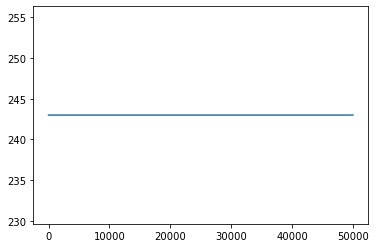

In [81]:
import matplotlib.pyplot as plt
plt.plot(sc)
print(max(sc))

In [73]:
max(sc)

243

In [62]:

seen

[67,
 73,
 142,
 149,
 175,
 145,
 227,
 79,
 224,
 217,
 226,
 173,
 39,
 228,
 139,
 170,
 88,
 122,
 95,
 100,
 102,
 87,
 132]

In [69]:

row_idx, col_idx = test.nonzero()
nnranks = list()

idx_list = list()
for c in range(train.shape[1]):
    positives =train[:,c].nonzero()[0]
    idx_list.append(positives)
    

for row, col, ran in tqdm.tqdm_notebook(zip(row_idx, col_idx, ranks), total=len(ranks)):
    
    test_ligand = fps[row]
    all_distances =fast_jaccard(test_ligand, fps)[0]
    closest_distances = list()
    for idx in idx_list:
        closest_distance = all_distances[idx].min()
        closest_distances.append(closest_distance)
    
    #mask the targets that are known positives so we only calculate rank amongst unknown. 
    closest_distances = np.ma.masked_array(closest_distances, mask=(train[row]==1).toarray()[0])
    prediction_ranks = rankdata(closest_distances)
    
    rank = prediction_ranks[col]
    nnranks.append(rank)
    print(rank, ran)

NameError: name 'ranks' is not defined